In [1]:
def load_sentences(path: str):
    chunks = []
    with open(path) as file:
        for line in file.readlines():
            line = line.strip()
            if line:
                chunks.append(line)
    return chunks

meditations = '../data/meditations.txt'
chunks = load_sentences(meditations)

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(chunk: str):
    chunk = chunk.lower()
    chunk = re.sub(r'[^a-z\s]', '', chunk)
    tokens = word_tokenize(chunk)
    cleaned_tokens = [
        word for word in tokens
        if word not in stop_words and word not in punctuation
    ]
    cleaned_chunk = ' '.join(cleaned_tokens)
    return cleaned_chunk

chunks_clean = list(clean_text(chunk) for chunk in chunks)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/garrett.partenza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/garrett.partenza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/garrett.partenza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from gensim.models import FastText, KeyedVectors

corpus = list(chunk.split() for chunk in chunks_clean)

model = FastText(
    corpus,
    vector_size=256,
    window=5,
    min_count=2,
    sg=0,
    workers=4,
    bucket=100000
)

model.save("word2vec_model")

In [4]:
model.wv["test"].dtype

dtype('float32')

In [5]:
import numpy as np

def embed_chunk(chunk: str, model):
    embeddings = list(model.wv[word].astype(np.float64) for word in chunk.split())
    return np.mean(embeddings, axis=0)


model = FastText.load("word2vec_model")
vectors = list(embed_chunk(chunk, model) for chunk in chunks_clean)
print(vectors[0].dtype)

float64


In [6]:
import pandas as pd

database = pd.DataFrame.from_dict(
    {
        "chunk": chunks,
        "chunk_clean": chunks_clean,
        "vector": vectors
    }
)

database[["chunk", "vector"]].to_csv("meditations.csv")

database.head()

,chunk,chunk_clean,vector
0,From my grandfather Verus I learned good moral...,grandfather verus learned good morals governme...,"[-0.114802713905062, 0.12162058906895774, 0.09..."
1,From the reputation and remembrance of my fath...,reputation remembrance father modesty manly ch...,"[-0.1567354475458463, 0.16537369911869368, 0.1..."
2,"From my mother, piety and beneficence, and abs...",mother piety beneficence abstinence evil deeds...,"[-0.13390534929931164, 0.14170187432318926, 0...."
3,"From my great-grandfather, not to have frequen...",greatgrandfather frequented public schools goo...,"[-0.12946307379752398, 0.1365021833529075, 0.1..."
4,"From my governor, to be neither of the green n...",governor neither green blue party games circus...,"[-0.10817492223129822, 0.1142325047403574, 0.0..."


In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the list of vectors to a 2D numpy array
X = np.array(database['vector'].tolist())

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (standardizing)
X_scaled = scaler.fit_transform(X)

# Ensure the column `database.vector` is set correctly
database['vector'] = [list(x) for x in X_scaled]  # Convert numpy arrays to lists of floats

# Save the scaler's mean and scale values
scaler.mean_.astype(np.float64).tofile("mean.bin")
scaler.scale_.astype(np.float64).tofile("scale.bin")

# Display the updated database
database.head()

,chunk,chunk_clean,vector
0,From my grandfather Verus I learned good moral...,grandfather verus learned good morals governme...,"[1.773777261390655, -1.758410052040218, -1.764..."
1,From the reputation and remembrance of my fath...,reputation remembrance father modesty manly ch...,"[-0.10057444012921535, 0.09099990327807311, 0...."
2,"From my mother, piety and beneficence, and abs...",mother piety beneficence abstinence evil deeds...,"[0.9199083612266777, -0.9095897322379161, -0.8..."
3,"From my great-grandfather, not to have frequen...",greatgrandfather frequented public schools goo...,"[1.1184736805479394, -1.1293766281656887, -1.1..."
4,"From my governor, to be neither of the green n...",governor neither green blue party games circus...,"[2.0700329910422934, -2.070698634326427, -2.06..."


In [8]:
database[["chunk", "vector"]].to_csv("meditations.csv")

In [9]:
database.vector[0]

[1.773777261390655,
 -1.758410052040218,
 -1.7641138373480818,
 1.7742959935217866,
 1.7700787427048166,
 1.791428747348872,
 1.764725339142251,
 -1.7824131885747212,
 1.7766630692286964,
 1.7684725121202967,
 1.7959845246780988,
 -1.779228342199831,
 -1.775125496834048,
 -1.7916548325560937,
 -1.7673088064985651,
 1.7533427497916665,
 1.7945579562685858,
 1.7575420418953929,
 1.7669281738167755,
 -1.7806992603540146,
 1.7778054860776429,
 -1.7805439464425001,
 -1.779352293078363,
 -1.6883198658870553,
 1.7826710279005402,
 1.8211934588971297,
 -1.8590576439641273,
 1.7747018040155287,
 1.7778501183422468,
 1.86193137433236,
 1.8345244860864351,
 -1.7727877773571563,
 -1.7092232400063927,
 1.7851598706730756,
 -1.7735944896305624,
 1.7813143363055148,
 1.7798969345790747,
 -1.7758542841424245,
 1.7824883495886272,
 1.7796169045847987,
 1.769231894432047,
 -1.7734791366334934,
 -1.7608620067127911,
 1.7744280556217777,
 -1.772511375014033,
 -1.7647839287840956,
 -1.7950387396426932,
 1.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

query = "universe and planet"
print(clean_text(query))
top_k = 3

query_vector = embed_chunk(clean_text(query), model)

similarity_scores = cosine_similarity([query_vector], database.vector.to_list())[0]
similarity_pairs = list(zip(database.chunk, similarity_scores))
results = sorted(similarity_pairs, key=lambda x: x[1], reverse=True)

top_k_results = []
for k in range(top_k):
    print(results[k][0])
    top_k_results.append(results[k][0])

universe planet
Neither the labour which the hand does nor that of the foot is contrary to nature, so long as the foot does the foot's work and the hand the hand's. So then neither to a man as a man is his labour contrary to nature, so long as it does the things of a man. But if the labour is not contrary to his nature, neither is it an evil to him.
Do wrong to thyself, do wrong to thyself, my soul; but thou wilt no longer have the opportunity of honouring thyself. Every man's life is sufficient. But thine is nearly finished, though thy soul reverences not itself but places thy felicity in the souls of others.
Nothing can happen to any man which is not a human accident, nor to an ox which is not according to the nature of an ox, nor to a vine which is not according to the nature of a vine, nor to a stone which is not proper to a stone. If then there happens to each thing both what is usual and natural, why shouldst thou complain? For the common nature brings nothing which may not be bo

In [11]:
from gensim.models.fasttext_inner import ft_hash_bytes
import json

def custom_ft_hash_bytes(bytez: bytes) -> int:
    h = 2166136261
    for b in bytez:
        h = h ^ b  # XOR the current byte value
        h = h * 16777619  # Multiply by the magic prime number
    return h & 0xFFFFFFFF  # Ensure the result is bounded to 32 bits

def generate_char_ngrams(text, n):
    """
    Generates character n-grams from a given text.

    Args:
        text (str): The input text.
        n (int): The length of the n-grams.
    Returns:
        list: A list of character n-grams.
    """
    ngrams = [text[i:i+n] for i in range(len(text) - n + 1)]
    return ngrams

def generate_ngrams(word, min=3, max=6):
    ngram_lists = list(generate_char_ngrams(word, x) for x in range(min, max+1))
    ngrams = [item for sublist in ngram_lists for item in sublist]
    return ngrams

def custom_embed(word: str):
    if word in model.wv.key_to_index:
        print("Whole word found")
        return model.wv.vectors[model.wv.key_to_index[word]]
    ngrams = generate_ngrams("<"+word+">")
    res = np.zeros(256)
    for ngram in ngrams:
        bytez = ngram.encode('utf-8')
        hash_value = ft_hash_bytes(bytez)
        bounded_hash_value = hash_value % 100000
        vec = model.wv.vectors_ngrams[bounded_hash_value]
        res += vec
    return res / len(ngrams)

word = "apple"
custom_embedding = custom_embed(word)
gensim_embedding = model.wv[word]

print(all(np.isclose(custom_embedding, gensim_embedding)))

True


In [12]:
model.wv.vectors_ngrams.astype(np.float64).tofile("ngrams.bin")

In [13]:
model.wv.vectors.astype(np.float64).tofile("vectors.bin")


In [14]:
import json

with open("vocab.json", "w") as file:
    json.dump(model.wv.key_to_index, file)

In [15]:
database.head()

,chunk,chunk_clean,vector
0,From my grandfather Verus I learned good moral...,grandfather verus learned good morals governme...,"[1.773777261390655, -1.758410052040218, -1.764..."
1,From the reputation and remembrance of my fath...,reputation remembrance father modesty manly ch...,"[-0.10057444012921535, 0.09099990327807311, 0...."
2,"From my mother, piety and beneficence, and abs...",mother piety beneficence abstinence evil deeds...,"[0.9199083612266777, -0.9095897322379161, -0.8..."
3,"From my great-grandfather, not to have frequen...",greatgrandfather frequented public schools goo...,"[1.1184736805479394, -1.1293766281656887, -1.1..."
4,"From my governor, to be neither of the green n...",governor neither green blue party games circus...,"[2.0700329910422934, -2.070698634326427, -2.06..."


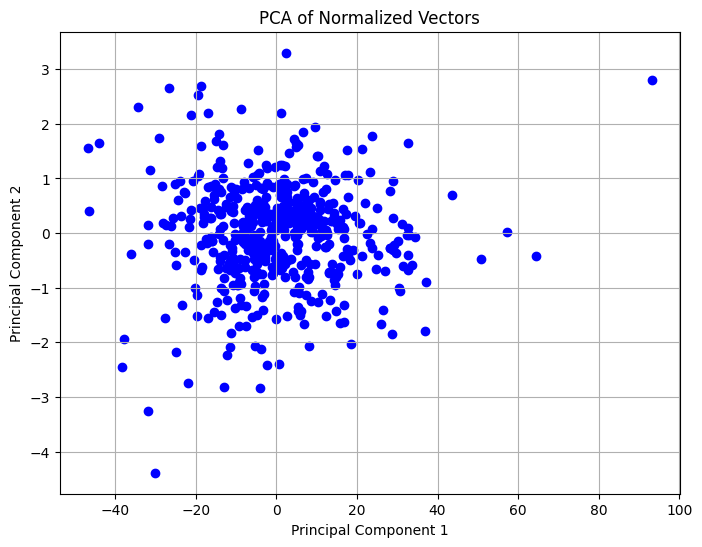

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')
plt.title('PCA of Normalized Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [17]:
database.head()

,chunk,chunk_clean,vector
0,From my grandfather Verus I learned good moral...,grandfather verus learned good morals governme...,"[1.773777261390655, -1.758410052040218, -1.764..."
1,From the reputation and remembrance of my fath...,reputation remembrance father modesty manly ch...,"[-0.10057444012921535, 0.09099990327807311, 0...."
2,"From my mother, piety and beneficence, and abs...",mother piety beneficence abstinence evil deeds...,"[0.9199083612266777, -0.9095897322379161, -0.8..."
3,"From my great-grandfather, not to have frequen...",greatgrandfather frequented public schools goo...,"[1.1184736805479394, -1.1293766281656887, -1.1..."
4,"From my governor, to be neither of the green n...",governor neither green blue party games circus...,"[2.0700329910422934, -2.070698634326427, -2.06..."


In [21]:
API_KEY = "sk-proj-pSKwGfnENErPahDI0SZHaWR1LVippg2Mhn2ECWP6Em590v3e_fXlhmqQsVvorLGvItt1brSN8AT3BlbkFJWE"

from openai import OpenAI
client = OpenAI()

response = client.embeddings.create(
    input=database.chunk[1000],
    model="text-embedding-3-small"
)

print(response.data[0].embedding)

ModuleNotFoundError: No module named 'openai'